In [1]:
import tarfile
import matplotlib.pyplot as plt
import matplotlib  #ajustar
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import backend as K
from minisom import MiniSom
import idx2numpy
import csv
import pickle

import import_ipynb
from utils import *
from autoencoder_and_clustering_models import *
from som_plots import *
from read_preprocess_cifar10 import *

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from autoencoder_and_clustering_models.ipynb
importing Jupyter notebook from som_plots.ipynb
importing Jupyter notebook from read_preprocess_cifar10.ipynb


In [2]:
# After download the dataset from  https://www.cs.toronto.edu/~kriz/cifar.html, use these lines to unzip the data
# Change 'arq_path' accordingly
## unzip
#arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\MeusProjetos\cifar-10-python.tar.gz'  # folder where the zipped file is located
#my_tar = tarfile.open(arq_path)
#arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\MeusProjetos'  # specify which folder to extract to
#my_tar.extractall(arq_path) 
#my_tar.close()

In [3]:
print('Example of one of the pre trained auto convolutional encoder \n')
model, model_encoder = deep_clustering_model('D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\Encoder_model_0.h5', input_shape = (28,28,1))
model_encoder.summary()

Example of one of the pre trained auto convolutional encoder 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 32, 32, 32)        4736      
_________________________________________________________________
AC_0 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
BN_0 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 16, 16, 16)        12816     
_________________________________________________________________
AC_1 (Activation)            (None, 16, 16, 16)        0         
___________________________________________________________

In [4]:
def test_decay(learning_rate, t, max_iter):
    """Decay function of the learning process.
    Parameters
    ----------
    learning_rate : float
        current learning rate.
    t : int
        current iteration.
    max_iter : int
        maximum number of iterations for the training.
    """
  
    #return learning_rate*np.exp(-t/7500) + 10**-17
    return learning_rate / (1+t/(max_iter/3000))

In [5]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2'

batch = load_data (arq_path)

i_crossVal = None
i_train = np.array([w for w in range(5) if not w == i_crossVal])
        
data_train, data_test, label_train, label_test = datasets_crossValitation (batch, i_train, i_crossVal=i_crossVal)

        
y_hat_train = data_train.reshape( (len(data_train),-1) ) 
y_hat_test = data_test.reshape( (len(data_test),-1) ) 
       
#som = MiniSom(32,32, 10, sigma=27, learning_rate=.1, activation_distance='euclidean', topology='hexagonal',neighborhood_function='gaussian',decay_function=test_decay, random_seed=None)
som = MiniSom(25,25, y_hat_train.shape[1], sigma=6, learning_rate=.1, activation_distance='euclidean', topology='hexagonal',neighborhood_function='gaussian',decay_function=test_decay, random_seed=None)
print("Training model ",  '...')
som.train(y_hat_train, 700000, verbose = True)  # random training
print('\n')
    
# saving the som in the file som.p
with open(arq_path + '\SOM_model_trained_with_flattened_cifar10.p', 'wb') as outfile:
    pickle.dump(som, outfile)

D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\data_batch_1
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\data_batch_2
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\data_batch_3
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\data_batch_4
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\data_batch_5
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\/test_batch
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10\cifar-10-batches-py\batches.meta
Training model  ...
 [ 700000 / 700000 ] 100% - 0:00:00 left 
 quantization error: 9.16951763827222






------------------------------------------------------------------------------------------------------
					 Results of Model 
------------------------------------------------------------------------------------------------------




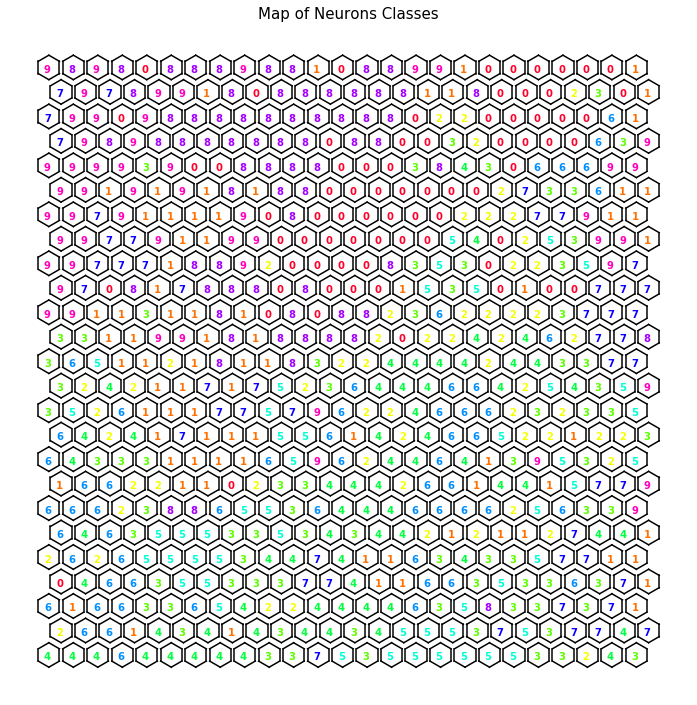

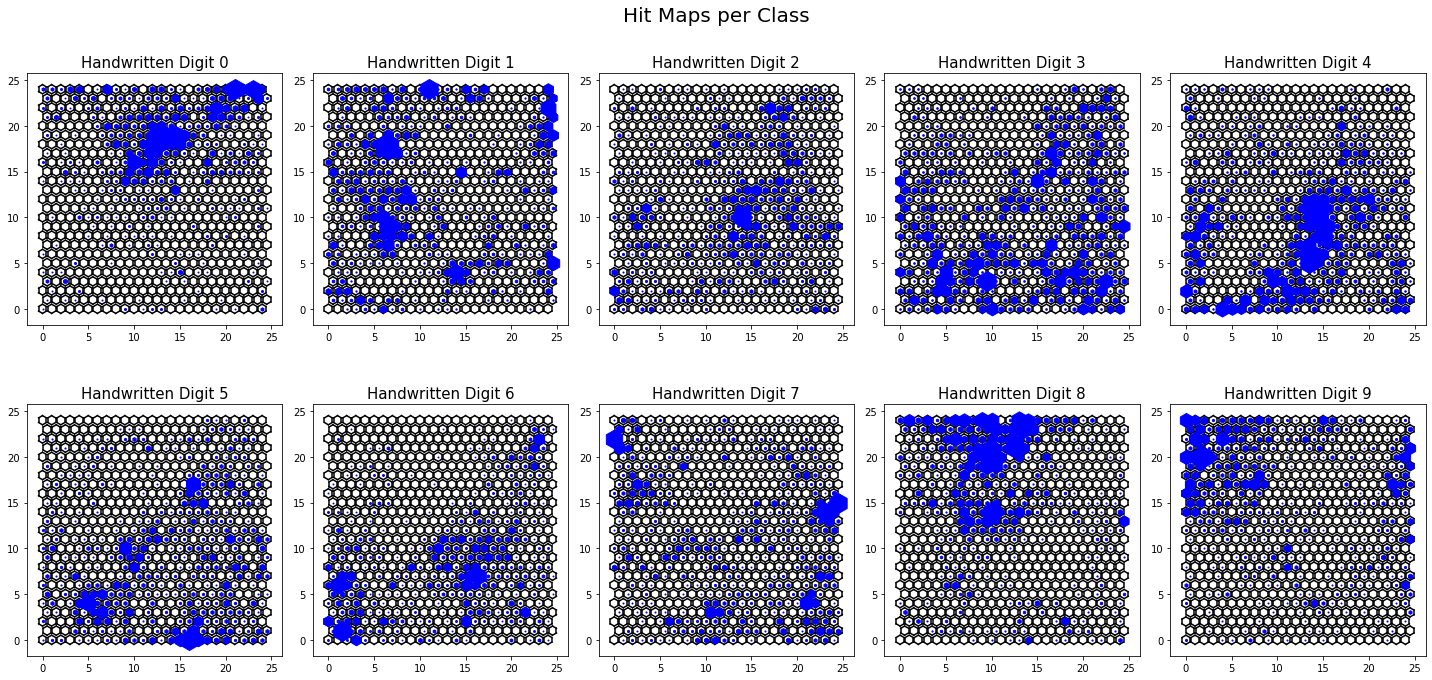



	Map of Neurons Distance


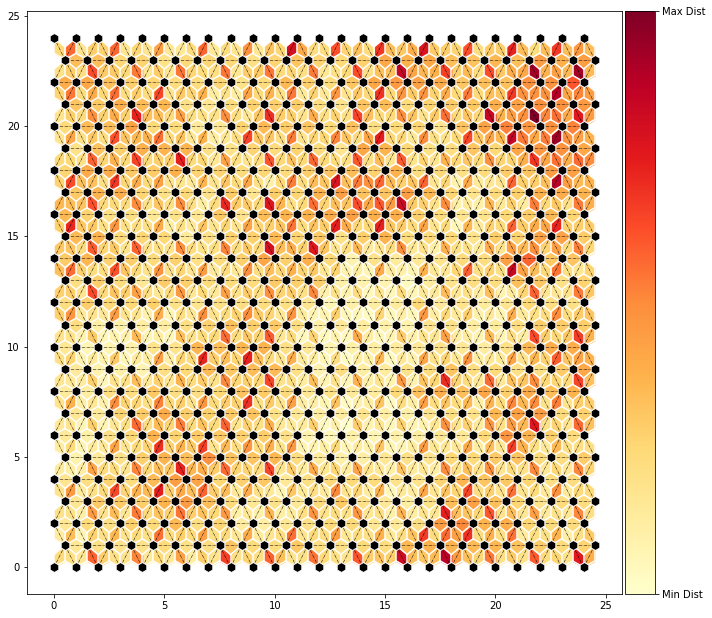

Clusterization purity = 0.38430
Clusterization entropy = 2.25074




In [43]:
arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2'
labels = label_test

with open(arq_path + '\SOM_model_trained_with_flattened_cifar10.p', 'rb') as infile:
    som = pickle.load(infile)
    
#y_hat_test = data_test.reshape( (len(data_test),-1) )   
data = y_hat_test
    
print('\n')
print('------------------------------------------------------------------------------------------------------')
print('\t\t\t\t\t Results of Model ')
print('------------------------------------------------------------------------------------------------------')
print('\n')
fig = plt.figure(figsize=(10,10))
pur, entro = neurons_classes(som, data, labels)
plt.title('Map of Neurons Classes', fontsize=15)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig( arq_path + '\\neurons_classes_flattenedImage.jpg', bbox_inches='tight')
plt.show()

print('\n')
fig = plt.figure(figsize=(20,10))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    som_hits(data[np.squeeze(labels)==i,:],som,annotation=False)
    ax.set_title('Handwritten Digit '+str(i),  fontsize=15)
fig.suptitle('Hit Maps per Class', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(arq_path + '\\hit_map_per_class_flattenedImage.jpg', bbox_inches='tight')
plt.show()
 
print('\n')
print('\tMap of Neurons Distance')
fig = plt.figure(figsize=(10,10))
dist_map(som, distSquared = False)
#plt.title('Map of Neurons Distance', fontsize=15)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig(arq_path + '\\neurons_distances_flattenedImage.jpg', bbox_inches='tight')
plt.show()
   

print('Clusterization purity = %.5f' %(pur))
print('Clusterization entropy = %.5f' %(entro))
  
print('\n')


In [ ]:


arq_path = 'D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2'

batch = load_data (arq_path)
   
    
for i_crossVal in range(5):
    
        
    i_train = np.array([w for w in range(5) if not w == i_crossVal])
        
    i_train = np.array([w for w in range(5) if not w == i_crossVal])
        
    data_train, data_val, data_test, label_train, label_val, label_test = datasets_crossValitation (batch, i_train, i_crossVal=i_crossVal)

    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (28,28,1))
        
    y_hat_train = model_encoder.predict( data_train )
    y_hat_test = model_encoder.predict( data_test )
        
    #som = MiniSom(32,32, 10, sigma=27, learning_rate=.1, activation_distance='euclidean', topology='hexagonal',neighborhood_function='gaussian',decay_function=test_decay, random_seed=None)
    som = MiniSom(32,32, y_hat_train.shape[1], sigma=6, learning_rate=.2, activation_distance='euclidean', topology='hexagonal',neighborhood_function='gaussian',decay_function=test_decay, random_seed=None)
    print("Training model ", i_crossVal, '...')
    som.train(y_hat_train, 510000)  # random training
    print('\n')
    
    # saving the som in the file som.p
    with open(arq_path + '\SOM_model_'+str(i_crossVal)+'.p', 'wb') as outfile:
        pickle.dump(som, outfile)

    
    

D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\data_batch_1
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\data_batch_2
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\data_batch_3
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\data_batch_4
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\data_batch_5
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\/test_batch
D:\Luiza\OneDrive\Documentos\Doutorado\MeusProjetos\SOM\cifar10_2\cifar-10-batches-py\batches.meta
Training model  0 ...




------------------------------------------------------------------------------------------------------
					 Results of Model  0
------------------------------------------------------------------------------------------------------




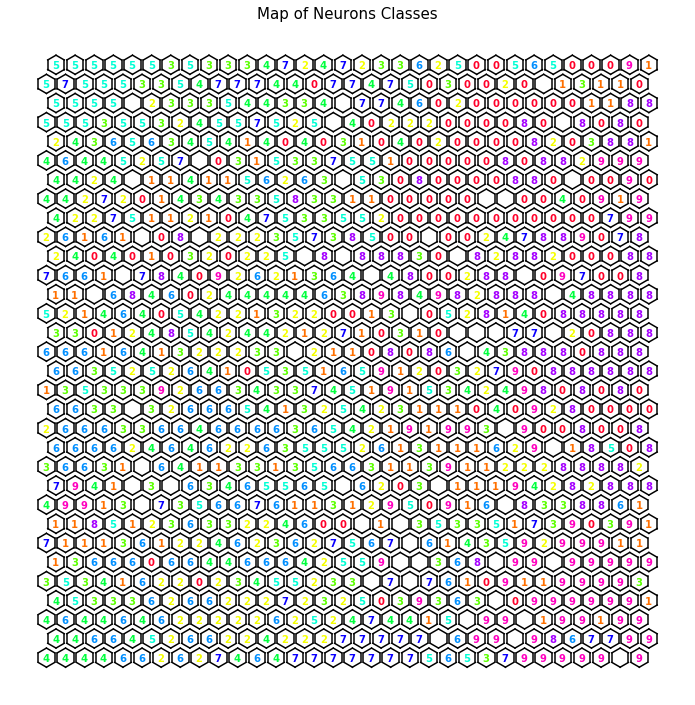

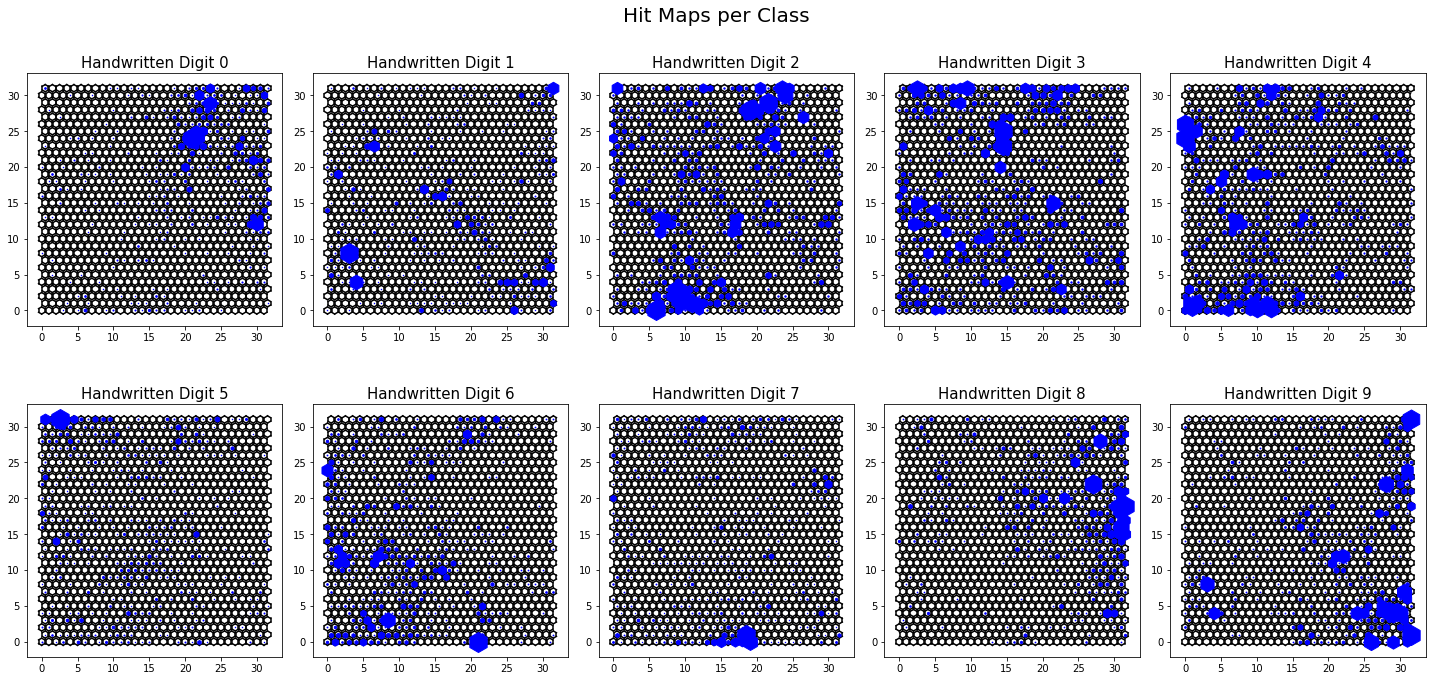



	Map of Neurons Distance


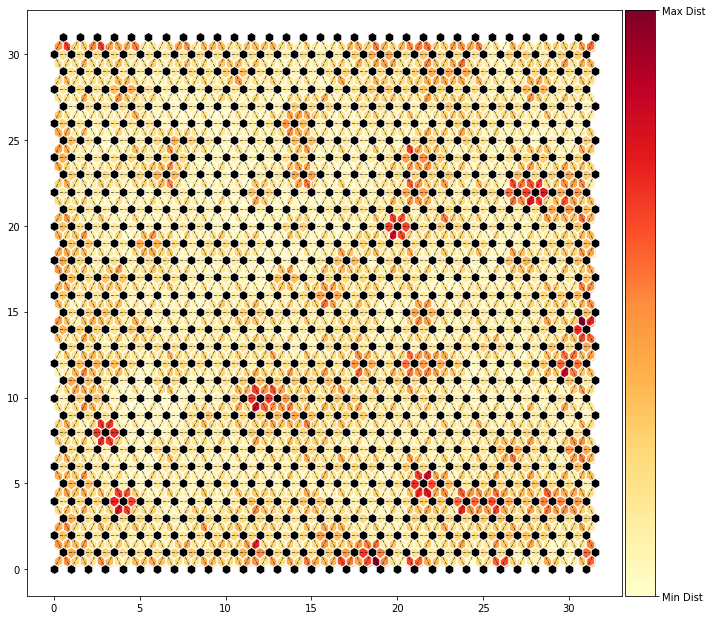

Clusterization purity = 0.43660
Clusterization entropy = 2.01734




------------------------------------------------------------------------------------------------------
					 Results of Model  1
------------------------------------------------------------------------------------------------------




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Programas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-1c33f3bbc54a>", line 26, in <module>
    plt.show()
  File "D:\Programas\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 269, in show
    return _show(*args, **kw)
  File "D:\Programas\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "D:\Programas\Anaconda3\lib\site-packages\IPython\core\display.py", line 306, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "D:\Programas\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<D:\Programas\Anaconda3\lib\site-packages\decorator.py:decorator-gen-9>", line 2, in __call__
  File "D:\Programas\Anaconda3\lib\site-pack

KeyboardInterrupt: 

In [6]:
labels = label_test
pur = np.zeros((5))
entro = np.zeros((5))

for i_crossVal in range(5):
    
    model, model_encoder = deep_clustering_model(arq_path + '\Encoder_model_'+str(i_crossVal)+'.h5', input_shape = (28,28,1))
    
    with open(arq_path + '\SOM_model_'+str(i_crossVal)+'.p', 'rb') as infile:
        som = pickle.load(infile)
    
    
    data = model_encoder.predict( data_test )
    
    print('\n')
    print('------------------------------------------------------------------------------------------------------')
    print('\t\t\t\t\t Results of Model ', str(i_crossVal))
    print('------------------------------------------------------------------------------------------------------')
    print('\n')
    fig = plt.figure(figsize=(10,10))
    pur[i_crossVal], entro[i_crossVal] = neurons_classes(som, data, labels)
    plt.title('Map of Neurons Classes', fontsize=15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.savefig(arq_path + '\\neurons_classes_encodedImage_'+str(i_crossVal)+'.jpg', bbox_inches='tight')
    plt.show()
    
    print('\n')
    fig = plt.figure(figsize=(20,10))
    for i in range(10):
        ax = fig.add_subplot(2,5,i+1)
        som_hits(data[np.squeeze(labels)==i,:],som,annotation=False)
        ax.set_title('Handwritten Digit '+str(i),  fontsize=15)
    fig.suptitle('Hit Maps per Class', fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.savefig(arq_path + '\\hit_map_per_class_encodedImage_'+str(i_crossVal)+'.jpg', bbox_inches='tight')
    plt.show()
    
    print('\n')
    print('\tMap of Neurons Distance')
    fig = plt.figure(figsize=(10,10))
    dist_map(som, distSquared = False)
    #plt.title('Map of Neurons Distance', fontsize=15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.savefig(arq_path + '\\neurons_distances_encodedImage_'+str(i_crossVal)+'.jpg', bbox_inches='tight')
    plt.show()
    
    
    print('Clusterization purity = %.5f' %(pur[i_crossVal]))
    print('Clusterization entropy = %.5f' %(entro[i_crossVal]))
    
    print('\n')


In [ ]:
pur_mean = np.mean(pur)
pur_std = np.std(pur)

entro_mean = np.mean(entro)
entro_std = np.std(entro)
    
print ('\nThe mean purity, based on previous known classes, for the test dataset using cross-validation is equal to %.5f, with standard deviation equal to %.5f' %(pur_mean, pur_std))
print ('\nThe mean entropy, based on previous known classes, for the test dataset using cross-validation is equal to %.5f, with standard deviation equal to %.5f' %(entro_mean, entro_std))